<a href="https://colab.research.google.com/github/madanjha/Machine-Learning/blob/main/Gen%2Bai_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
import re

In [ ]:
#Step -1 load the data
print(f"Amazon fine food reviews data set")
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file)

Amazon fine food reviews data set


In [ ]:
df.head(2) # 1-2-3-4-5. review-
#df['Score'].value_counts()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
#eda  - inves
df.shape
df.columns.to_list()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [ ]:
#EDa
print(f"Total Reviews : {len(df)}")
df.info()
df.isnull().sum()

Total Reviews : 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df_clean = df[['Text',"Score"]].dropna()
df_clean.head(2)
print(f"After cleaning data : {len(df_clean)}") #5l reviews

#5 ratings 1,2,3,4,5
print("RATING DISTRIBUTION")
score_counts = df_clean['Score'].value_counts().sort_index()
print(score_counts)
print(f"Percentages")
for score, count in score_counts.items():
  percentage = (count/len(df_clean))*100
  print(f"{score} star : {percentage:.2f}%")

After cleaning data : 568454
RATING DISTRIBUTION
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64
Percentages
1 star : 9.19%
2 star : 5.24%
3 star : 7.50%
4 star : 14.19%
5 star : 63.88%


In [ ]:
#1 star, 2 star 3, star
print("Sample review analysis")
for score in [1,2,3,4,5]:
  sample_review = df_clean[df_clean['Score'] == score]['Text'].iloc[0]
  print(f"{score}-star review")
  print(f"{sample_review[:200]}")

#idea senteces are grammaticlly forluate well    some /some
#no words thwet neg.pos could be

Sample review analysis
1-star review
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2-star review
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor
3-star review
This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't 
4-star review
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powd
5-star review
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The

In [ ]:
#data viz
df_clean['text_length'] = df_clean["Text"].str.len()
df_clean['word_count'] = df_clean['Text'].str.split().str.len()

In [ ]:
df_clean

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31
2,This is a confection that has been around a fe...,4,509,94
3,If you are looking for the secret ingredient i...,2,219,41
4,Great taffy at a great price. There was a wid...,5,140,27
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26
568450,I'm disappointed with the flavor. The chocolat...,2,252,46
568451,"These stars are small, so you can give 10-15 o...",5,372,66
568452,These are the BEST treats for training and rew...,5,200,35


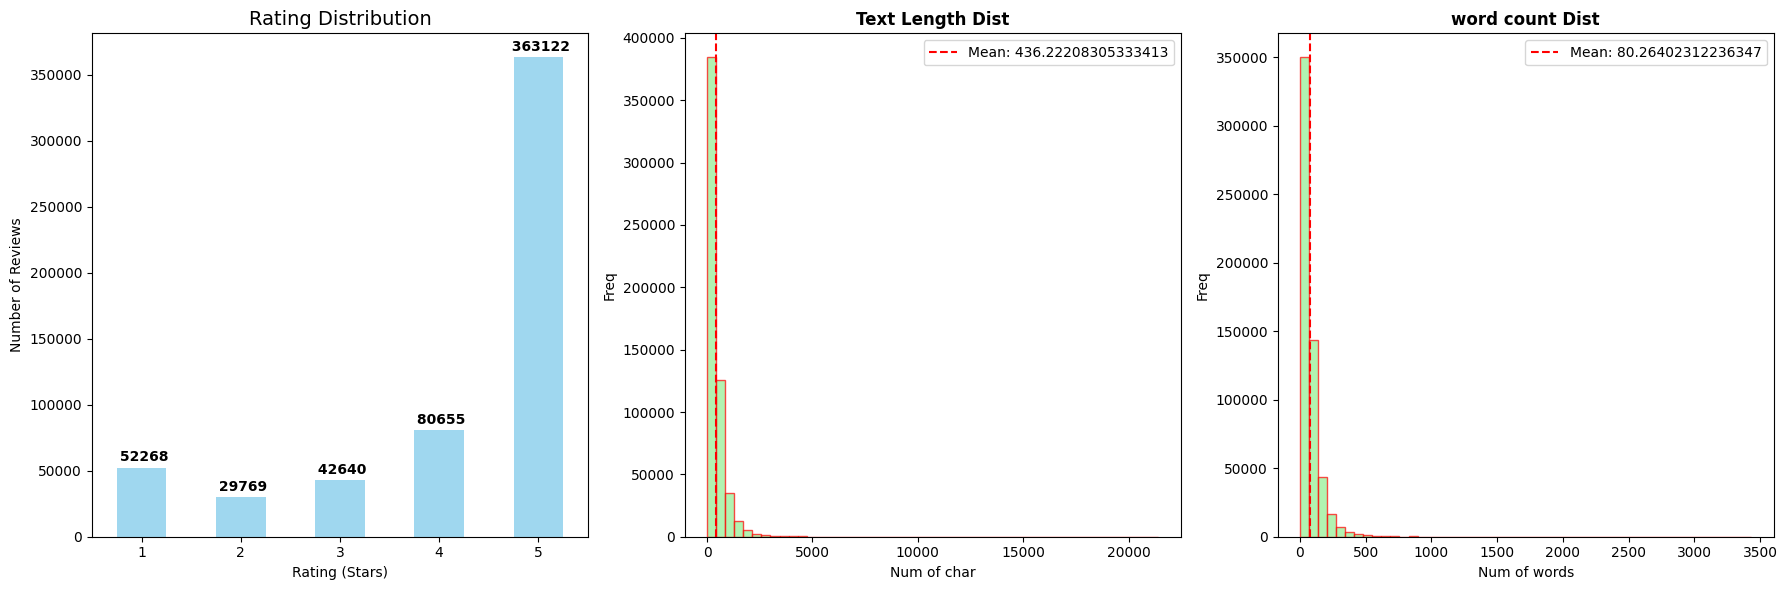

In [ ]:
#sizing the canvas
plt.figure(figsize=(18,6))

#plot-1 Rating distribbution
plt.subplot(1,3,1)
score_counts.plot(kind='bar',color='skyblue',alpha=0.8)
plt.title("Rating Distribution",fontsize=14)
plt.xlabel("Rating (Stars)")
plt.xticks(rotation=0)
plt.ylabel("Number of Reviews")
for idx, val in enumerate(score_counts.values):
  plt.text(idx,val+5000, f"{val: }", ha='center',fontweight='bold')

#plot-2 text length dist
plt.subplot(1,3,2)
plt.hist(df_clean['text_length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("Text Length Dist",fontweight='bold')
plt.xlabel("Num of char")
plt.ylabel("Freq")
plt.axvline(df_clean['text_length'].mean(), color='red',linestyle="--",
            label=f"Mean: {df_clean['text_length'].mean()}")
plt.legend()

#plot-3 word count dist
plt.subplot(1,3,3)
plt.hist(df_clean['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("word count Dist",fontweight='bold')
plt.xlabel("Num of words")
plt.ylabel("Freq")
plt.axvline(df_clean['word_count'].mean(), color='red',linestyle="--",
            label=f"Mean: {df_clean['word_count'].mean()}")
plt.legend()

plt.tight_layout()

In [ ]:
# df_clean.head(2)

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31


In [ ]:
#convert to binary classification
df_binary = df_clean[df_clean['Score']!= 3].copy() #aprt from 3 al 1,2,4,5
# df_binary['Score'].value_counts()

,count
Score,
5,363122
4,80655
1,52268
2,29769


In [ ]:
df_binary['sentiment'] = (df_binary['Score']>=4).astype(int)

In [ ]:
df_binary.head(2)
#distrinution. - binary class
print(f"Negative (1-2 star): {sum(df_binary['sentiment'] == 0):,}")
print(f"Positive (4-5 star): {sum(df_binary['sentiment'] == 1):,}")

Negative (1-2 star): 82,037
Positive (4-5 star): 443,777


In [ ]:
#check imbalnce - percentage
negative_pct = (sum(df_binary['sentiment'] == 0) / len(df_binary)) * 100
positive_pct = (sum(df_binary['sentiment'] == 1) / len(df_binary)) * 100
print(f"Negative : {negative_pct}")
print(f"Positive : {positive_pct}")

if positive_pct > 70:
  print(f"Dataset is imbalanced!- skewed postive reviews")

Negative : 15.601904856089796
Positive : 84.3980951439102
Dataset is imbalanced!- skewed postive reviews


In [ ]:
#handle imbalnce

#seperations
negative_reviews = df_binary[df_binary['sentiment'] == 0]
positive_reviews = df_binary[df_binary['sentiment'] == 1]

print(f"Original Imbalance")
print(f"Negative : {len(negative_reviews):,} ({len(negative_reviews)/len(df_binary)})")
print(f"Positive : {len(positive_reviews):,} ({len(positive_reviews)/len(df_binary)})")

#[undersmaple majority class] so that match minoroty class
n_minority = len(negative_reviews)

positive_downsampled = resample(positive_reviews,
                                replace=False,  #smaple without replancement
                                n_samples=n_minority, #minoruity
                                random_state=21)

#df_balanced
df_balanced = pd.concat([negative_reviews,positive_downsampled])

#shuffle
df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)

print(f"After balance")
print(f"Total Samples : {len(df_balanced)}")
print(f"Negative : {sum(df_balanced['sentiment'] == 0):,} ({sum(df_balanced['sentiment']==0)/len(df_balanced)**100})")
print(f"Positive : {sum(df_balanced['sentiment'] == 1):,} ({sum(df_balanced['sentiment']==1)/len(df_balanced)**100})")

Original Imbalance
Negative : 82,037 (0.15601904856089796)
Positive : 443,777 (0.843980951439102)
After balance
Total Samples : 164074
Negative : 82,037 (0.0)
Positive : 82,037 (0.0)


In [ ]:
df_binary.head(2)

,Text,Score,text_length,word_count,sentiment
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0


In [ ]:
df_balanced.head(2)

,Text,Score,text_length,word_count,sentiment
0,Our family now uses this in place of butter or...,5,323,65,1
1,the k- cups were thrown in an oversized box wi...,1,208,41,0


In [ ]:
#take a sample
sample_size = min(50000, len(df_balanced))
df_sample = df_balanced.sample(n=sample_size, random_state=21)

sample_negative = sum(df_sample['sentiment']==0)
sample_positive = sum(df_sample['sentiment']==1)
print(f"sample_negative : {sample_negative}")
print(f"sample_positive : {sample_positive}")

sample_negative : 25061
sample_positive : 24939


In [ ]:
#clean - text -> 1) convert lowercase
                #  2) remove special character :) (U+1F60A).  #, !
                #  3) keep onlu letter and spaces
                #  4) extra whitespcae   i_love__ice-cream

In [ ]:
def clean_text(text):
  text = text.lower()
  #remove all special numbers, keeping onlu letters and spaces
  text = re.sub(r'[^a-zA-Z\s]','', text)
  #romce
  text = ' '.join(text.split())
  return text

print("+++++++Text Preprocessing++++++")
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)
df_balanced.head(2)

# ori - clea

+++++++Text Preprocessing++++++


,Text,Score,text_length,word_count,sentiment,clean_text
0,Our family now uses this in place of butter or...,5,323,65,1,our family now uses this in place of butter or...
1,the k- cups were thrown in an oversized box wi...,1,208,41,0,the k cups were thrown in an oversized box wit...


In [ ]:
#RNN LSTM